# Validation Backward Compatibility (VBC) Source2Suffering Framework

__Objective__ : The aim of this Jupyter Notebook is to sequentially compare the different values produced by the original Lifetime Exposure framework developed by Thiery et al. (2021) and the Source2Suffering framework developed in Laridon et al. (2025). As a final benchmark to compare the results of both frameworks, we will examine the findings of the Expert Opinion written by Prof. W. Thiery for Greenpeace Romania regarding the "Neptun Deep" oil field project.

__Author__ : Amaury Laridon

__Date__ : 21 May 2025

---

Init Libraries and path

In [1]:
#%%  ----------------------------------------------------------------
# import and path
# ----------------------------------------------------------------

import xarray as xr
import pickle as pk
import time
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import mapclassify as mc
from copy import deepcopy as cp
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy as cr
import geopandas as gpd
import sys
from operator import index
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy import stats as sts
import regionmask as rm
import glob
%matplotlib inline

notebook_path = os.getcwd()  # Current path
print("Directory of the notebook:", notebook_path)
notebook_path = notebook_path

scripts_dir = "/data/brussel/vo/000/bvo00012/vsc11137/source2suffering"
data_dir = scripts_dir+"/data/"

sys.path.append(os.path.abspath(scripts_dir))

Directory of the notebook: /vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00012/vsc11137/source2suffering/sandbox


Settings

In [2]:
ages = np.arange(60,-1,-1)
age_young = 0
age_ref = np.nanmax(ages)
age_range = np.arange(0,105)
year_ref = 2020
year_start = year_ref - age_ref
birth_years = np.arange(year_start,year_ref+1)     
year_end = 2113 # based on maximum life expectancy reported in UNWPP
year_range = np.arange(year_start,year_end+1)
# Definition of the hazards 
hazards = [
    "burntarea",
    "cropfailedarea",
    "driedarea",
    "floodedarea",
    "heatwavedarea",
    "tropicalcyclonedarea"
]

## 1. Results of the Land Fraction Exposed (LFE) to hazard annually 

Here I compare Fig.(1a) of Thiery et al.(2021) with the results of the Source2Suffering framework

### Effect of the smoothing before remapping

#### A. Results with Smoothing 

In [3]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','rm'), 'rb') as f:
            ds_lfe_perregion_rm = pk.load(f)

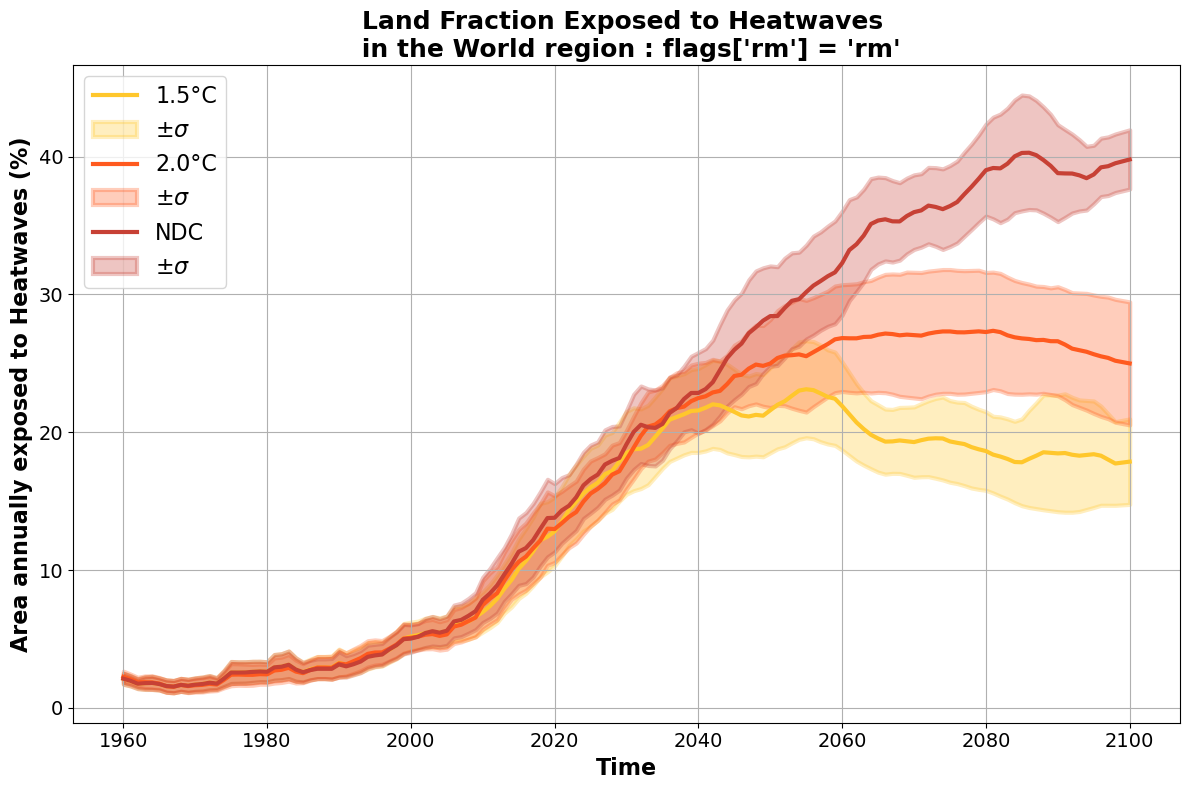

In [4]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_rm = ds_lfe_perregion_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_rm = ds_lfe_perregion_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_rm = ds_lfe_perregion_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_rm = ds_lfe_perregion_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_rm = ds_lfe_perregion_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_rm = ds_lfe_perregion_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_rm*100 - y_std_15_rm*100, lfe_15_rm*100 + y_std_15_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_rm*100 - y_std_20_rm*100, lfe_20_rm*100 + y_std_20_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_rm*100 - y_std_NDC_rm*100, lfe_NDC_rm*100 + y_std_NDC_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = 'rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig1_lfe_gmt_original_rm.png')
plt.show()

#### B. Results without Smoothing 

In [5]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','no_rm'), 'rb') as f:
            ds_lfe_perregion_no_rm = pk.load(f)

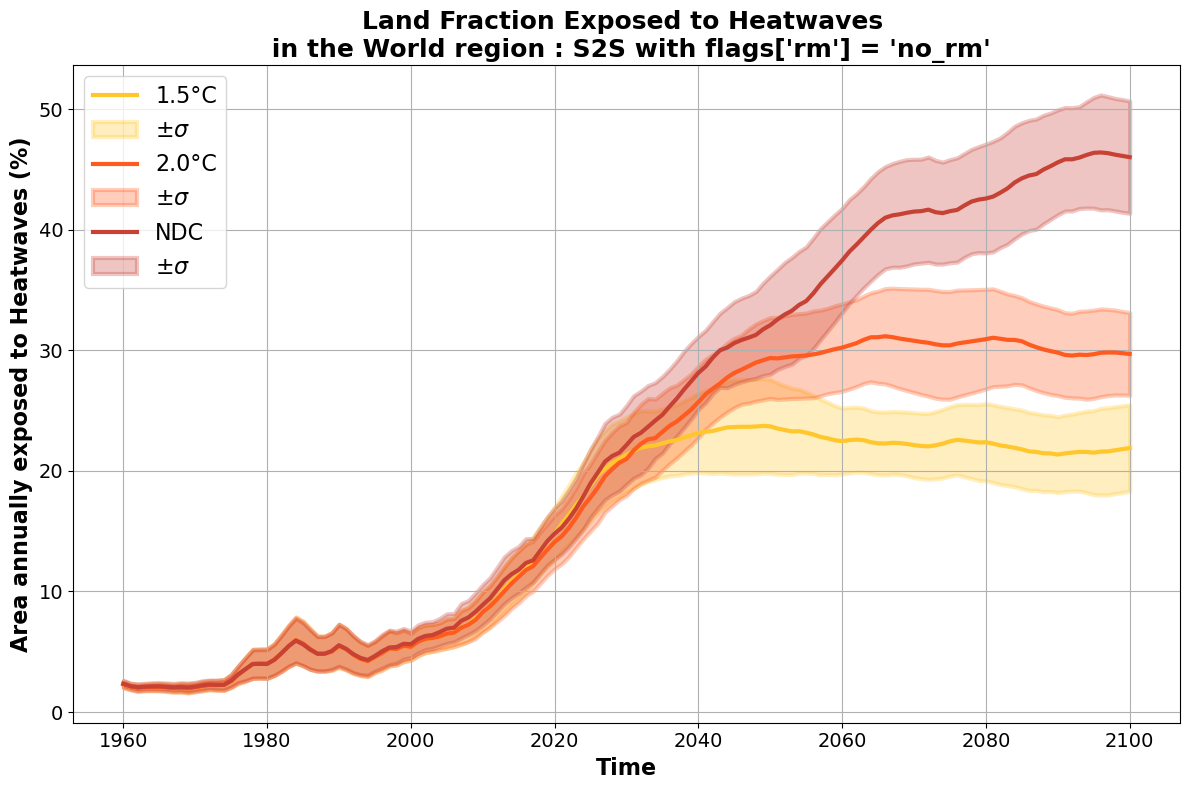

In [6]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_no_rm = ds_lfe_perregion_no_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_no_rm = ds_lfe_perregion_no_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_no_rm = ds_lfe_perregion_no_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_no_rm = ds_lfe_perregion_no_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_no_rm = ds_lfe_perregion_no_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_no_rm = ds_lfe_perregion_no_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_no_rm*100 - y_std_15_no_rm*100, lfe_15_no_rm*100 + y_std_15_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_no_rm*100 - y_std_20_no_rm*100, lfe_20_no_rm*100 + y_std_20_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_no_rm*100 - y_std_NDC_no_rm*100, lfe_NDC_no_rm*100 + y_std_NDC_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S with flags['rm'] = 'no_rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig2_lfe_gmt_original_no_rm.png')
plt.show()

#### C. Comparison between flags['rm'] within the Source2Suffering Framework

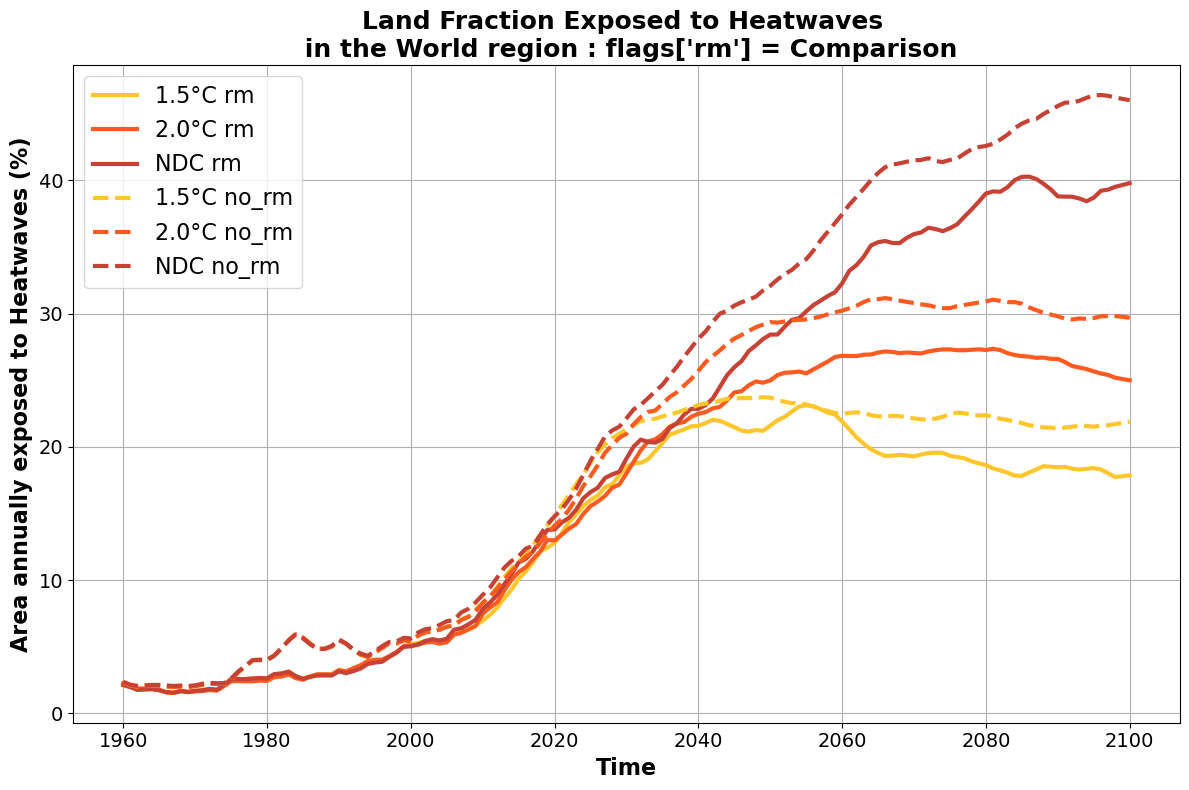

In [7]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_rm - y_std_15_rm, lfe_15_rm + y_std_15_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_rm - y_std_20_rm, lfe_20_rm + y_std_20_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_rm - y_std_NDC_rm, lfe_NDC_rm + y_std_NDC_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_no_rm - y_std_15_no_rm, lfe_15_no_rm + y_std_15_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_no_rm - y_std_20_no_rm, lfe_20_no_rm + y_std_20_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_no_rm - y_std_NDC_no_rm, lfe_NDC_no_rm + y_std_NDC_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = Comparison".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig3_lfe_gmt_original_rm_comp.png')
plt.show()

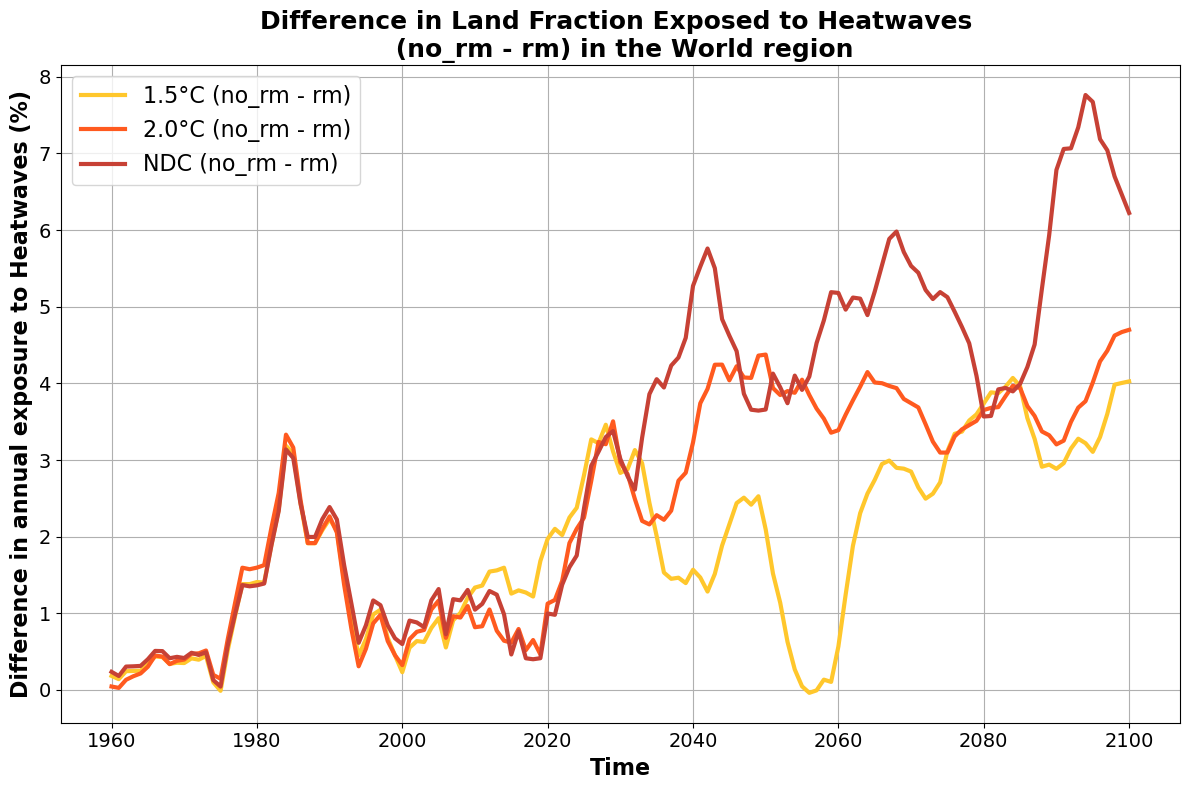

In [8]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    (lfe_15_no_rm - lfe_15_rm)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_20_no_rm - lfe_20_rm)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_NDC_no_rm - lfe_NDC_rm)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - rm)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (no_rm - rm) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig4_lfe_gmt_original_rm_diff.png')
plt.show()

#### D. Comparison between Source2Suffering framework with and flags['rm']='no_rm' and Thiery et al.(2021)

Import the .mat objects

In [9]:
from scipy.io import loadmat

WT_landfrac_15_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot.mat',squeeze_me=True)

WT_landfrac_15_plot = WT_landfrac_15_plot['landfrac_15_plot'][:-13]

WT_landfrac_15_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot_mms.mat',squeeze_me=True)

WT_landfrac_15_plot_mms = WT_landfrac_15_plot_mms['landfrac_15_mms_plot'][:-13]/2

WT_landfrac_20_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot.mat',squeeze_me=True)

WT_landfrac_20_plot = WT_landfrac_20_plot['landfrac_20_plot'][:-13]

WT_landfrac_20_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot_mms.mat',squeeze_me=True)

WT_landfrac_20_plot_mms = WT_landfrac_20_plot_mms['landfrac_20_mms_plot'][:-13]/2

WT_landfrac_NDC_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot.mat',squeeze_me=True)

WT_landfrac_NDC_plot = WT_landfrac_NDC_plot['landfrac_NDC_plot'][:-13]

WT_landfrac_NDC_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot_mms.mat',squeeze_me=True)

WT_landfrac_NDC_plot_mms = WT_landfrac_NDC_plot_mms['landfrac_NDC_mms_plot'][:-13]/2


Plot of Thiery et al.(2021) results

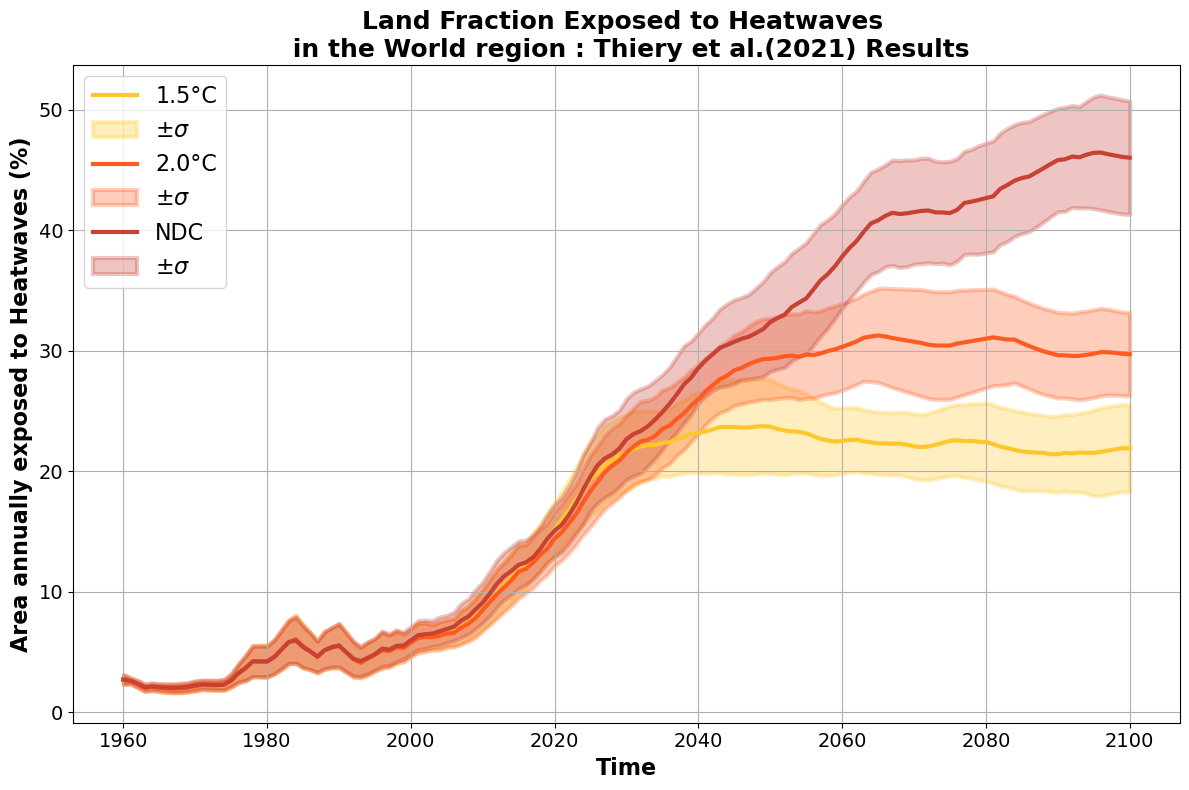

In [10]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_15_plot - WT_landfrac_15_plot_mms, WT_landfrac_15_plot + WT_landfrac_15_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_20_plot - WT_landfrac_20_plot_mms, WT_landfrac_20_plot + WT_landfrac_20_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_NDC_plot - WT_landfrac_NDC_plot_mms, WT_landfrac_NDC_plot + WT_landfrac_NDC_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : Thiery et al.(2021) Results".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig5_lfe_gmt_thiery_et_al.png')
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

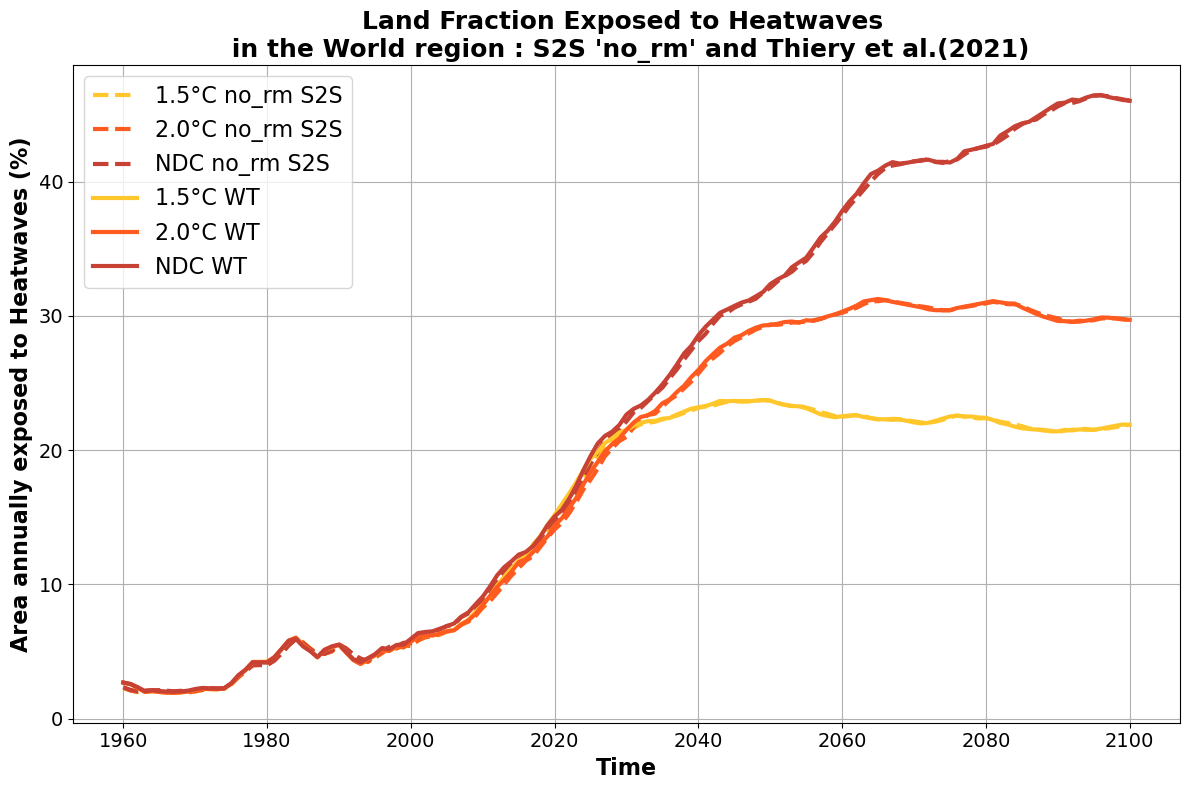

In [11]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' WT', lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S 'no_rm' and Thiery et al.(2021)".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig6_lfe_gmt_original_no_rm_thiery_et_al_comp.png')
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' - Thiery et al.(2021) results

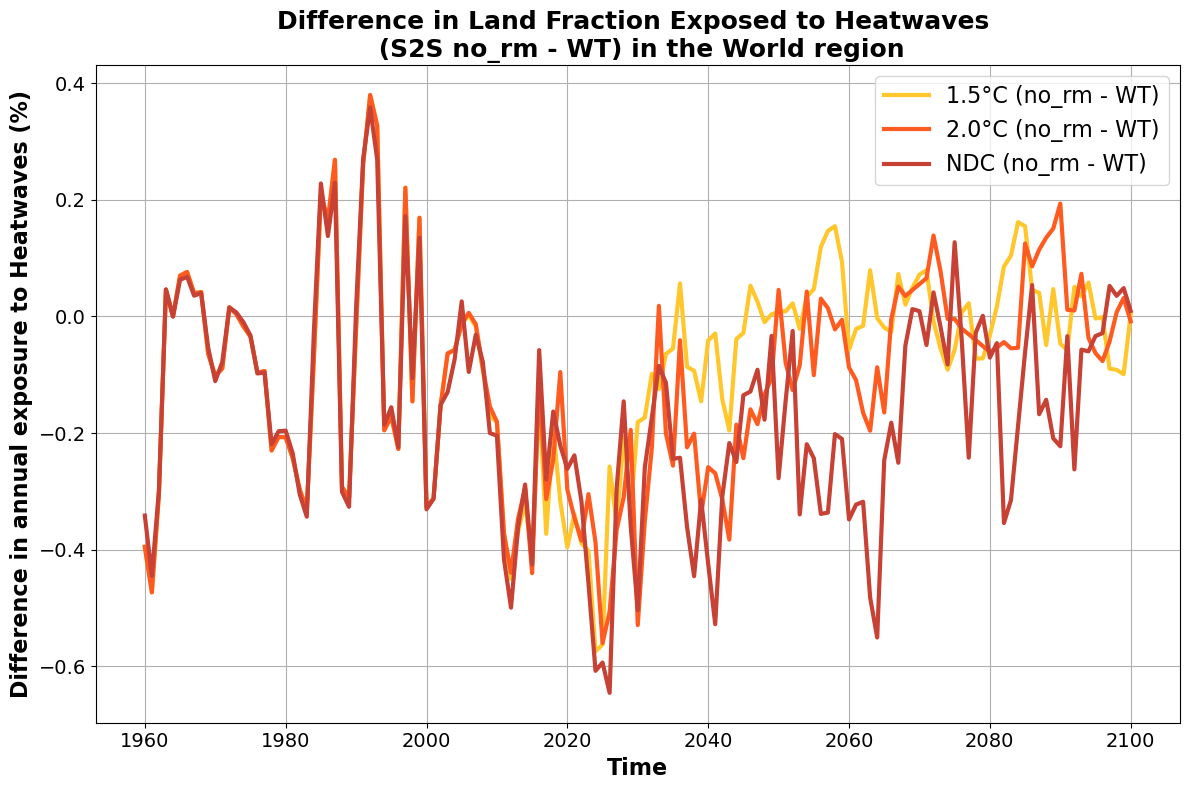

In [12]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    ((lfe_15_no_rm)*100 - WT_landfrac_15_plot),
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_20_no_rm)*100 - WT_landfrac_20_plot),
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_NDC_no_rm)*100- WT_landfrac_NDC_plot),
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - WT)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (S2S no_rm - WT) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig7_lfe_gmt_original_no_rm_thiery_et_al_diff.png')
plt.show()

Plot of the error between S2S flags['rm'] = 'no_rm' - Thiery et al.(2021) results

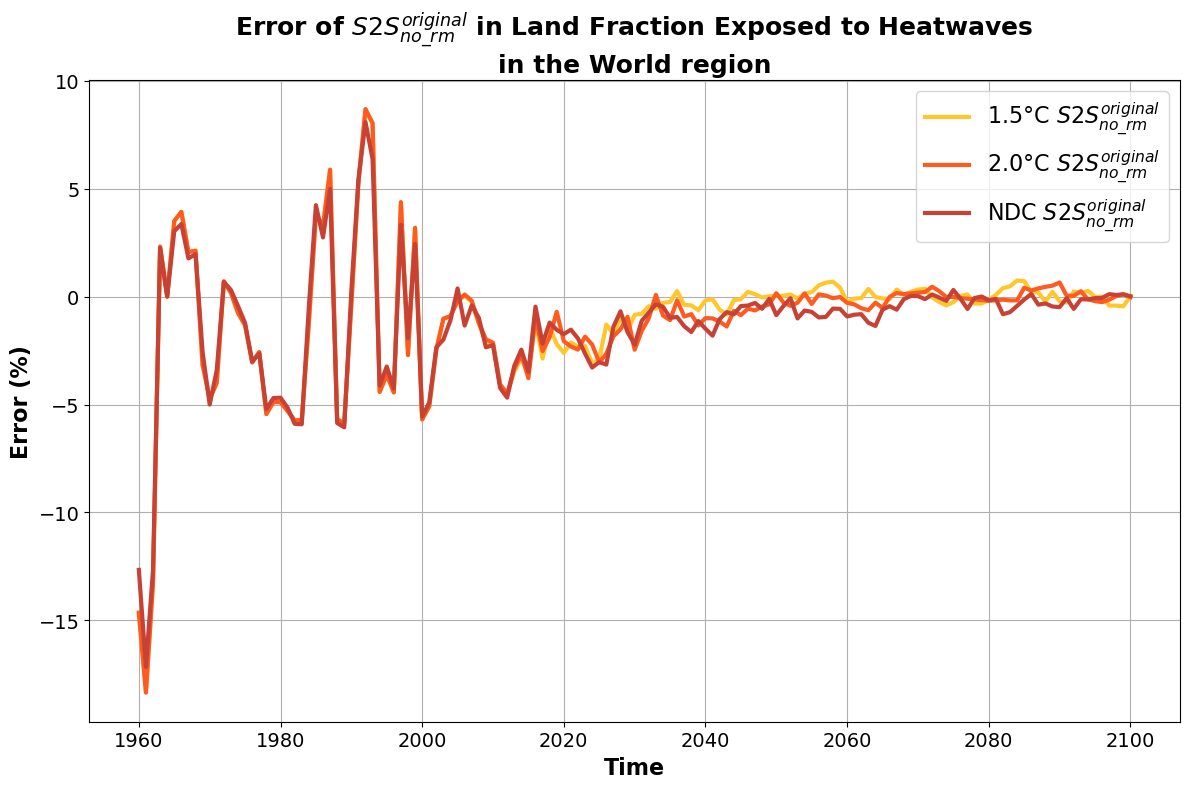

In [54]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    (((lfe_15_no_rm)*100 - WT_landfrac_15_plot)/WT_landfrac_15_plot)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((lfe_20_no_rm)*100 - WT_landfrac_20_plot)/WT_landfrac_20_plot)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((lfe_NDC_no_rm)*100- WT_landfrac_NDC_plot)/WT_landfrac_NDC_plot)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $S2S_{no\_rm}^{original}$',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Error of " + r"$S2S_{no\_rm}^{original}$" + " in Land Fraction Exposed to {} \nin the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Error (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig7_5_lfe_gmt_original_no_rm_thiery_et_al_error.png')
plt.show()

Plot of the $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

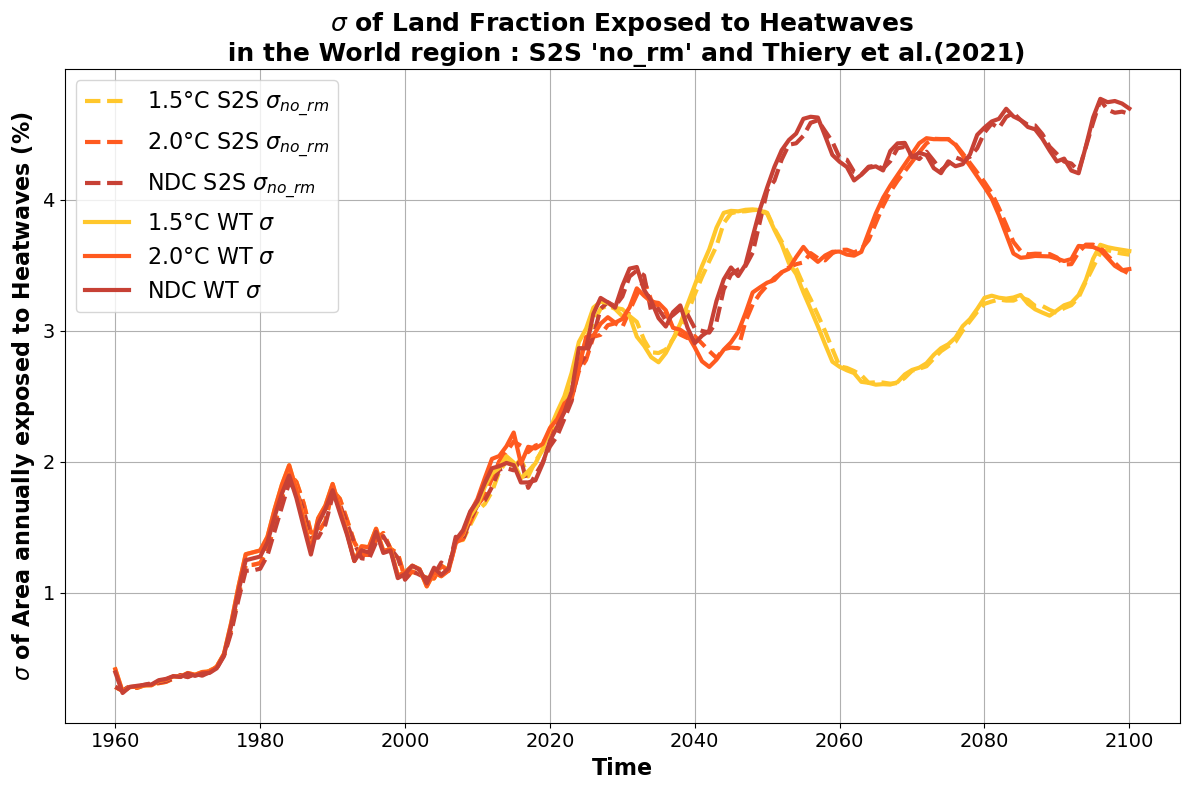

In [53]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], y_std_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], y_std_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], y_std_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' S2S' + r' $\sigma_{no\_rm}$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_15_plot_mms, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' WT' + r' $\sigma$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot_mms, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' WT' + r' $\sigma$', lw=3)

plt.plot(year_range[:-13], WT_landfrac_NDC_plot_mms, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' WT' + r' $\sigma$', lw=3)

plt.title(r"$\sigma$ of" + " Land Fraction Exposed to {} \n in the {} region : S2S 'no_rm' and Thiery et al.(2021)".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel(r"$\sigma$ " + "of Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig8_std_lfe_gmt_original_no_rm_thiery_et_al_comp.png')
plt.show()

Plot of the difference of $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

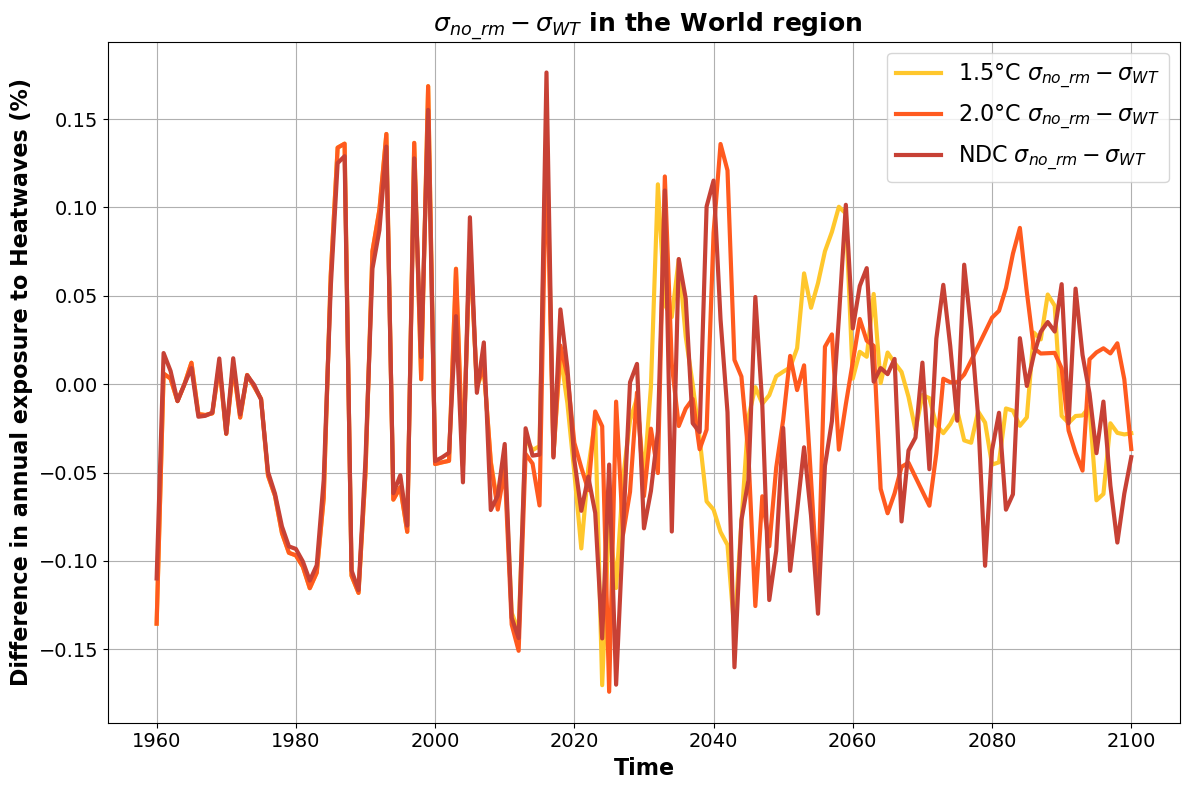

In [14]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    ((y_std_15_no_rm)*100 - WT_landfrac_15_plot_mms),
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((y_std_20_no_rm)*100 - WT_landfrac_20_plot_mms),
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((y_std_NDC_no_rm)*100- WT_landfrac_NDC_plot_mms),
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $\sigma_{no\_rm} - \sigma_{WT}$',
    lw=3
)

# Mise en forme du graphique
plt.title(
    r' $\sigma_{no\_rm} - \sigma_{WT}$' +' in the {} region'.format(region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig9_std_lfe_gmt_original_no_rm_thiery_et_al_diff.png')
plt.show()

Plot of the error of $\sigma$ of S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

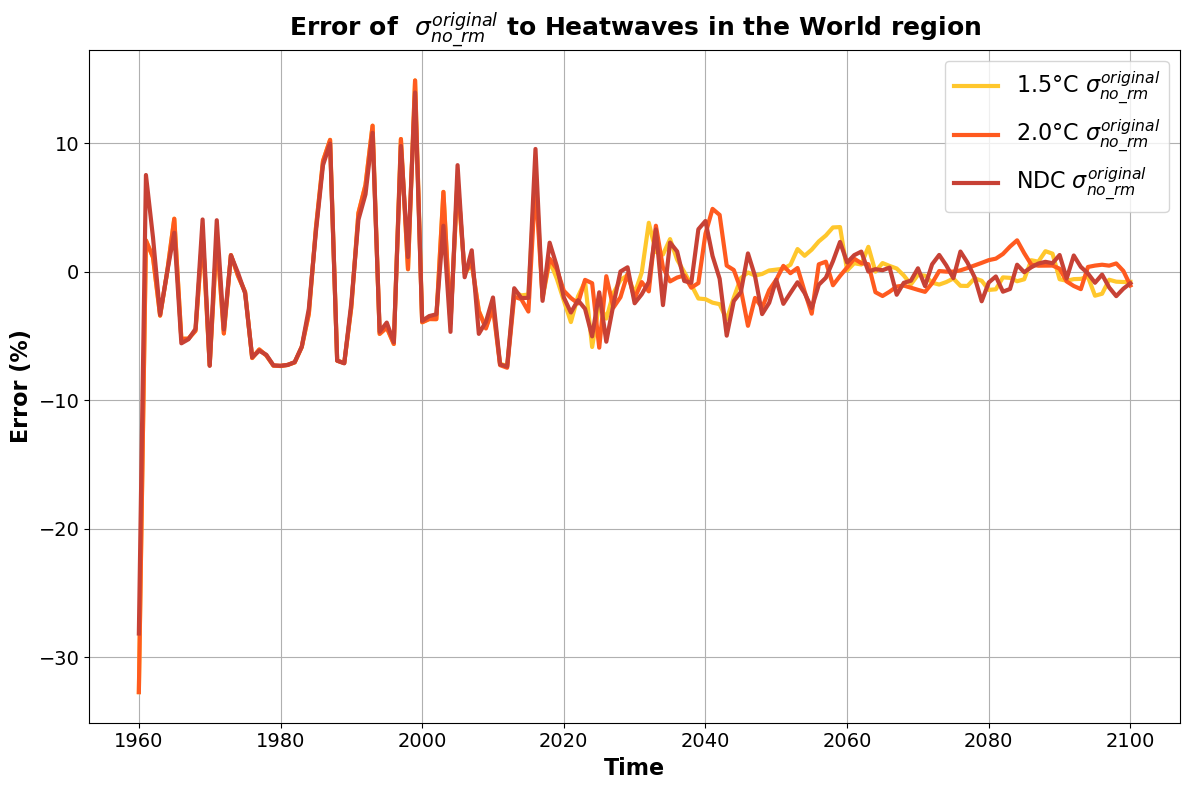

In [55]:
plt.close('all')

plt.figure(figsize=(12, 8))

plt.plot(
    year_range[:-13],
    (((y_std_15_no_rm)*100 - WT_landfrac_15_plot_mms)/WT_landfrac_15_plot_mms)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((y_std_20_no_rm)*100 - WT_landfrac_20_plot_mms)/WT_landfrac_20_plot_mms)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

plt.plot(
    year_range[:-13],
    (((y_std_NDC_no_rm)*100- WT_landfrac_NDC_plot_mms)/WT_landfrac_NDC_plot_mms)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + r' $\sigma_{no\_rm}^{original}$',
    lw=3
)

# Mise en forme du graphique
plt.title("Error of " + r' $\sigma_{no\_rm}^{original}$' + " to Heatwaves in the {} region".format(region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Error (%)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig9_5_std_lfe_gmt_original_no_rm_thiery_et_al_error.png')
plt.show()

### Effect of the Geometric Mean 

## 2. Results of emissions2npeople

### The Neptun Deep Assessment

#### 1. The smoothing effect

Plot of the values given by Thiery et al.(2021) and the S2S framework with the different combinaison of flags['gmt'] and flags['rm']

In [15]:
with open(data_dir+'source2suffering/assessment/Neptun_Deep/da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.pkl', 'rb') as f:
            da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep = pk.load(f)
        
with open(data_dir+'source2suffering/assessment/Neptun_Deep/da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_{}.pkl'.format('rm'), 'rb') as f:
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_{}.pkl'.format('no_rm'), 'rb') as f:
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_{}.pkl'.format('rm'), 'rb') as f:
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_{}.pkl'.format('no_rm'), 'rb') as f:
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm = pk.load(f)

year_start_as = 2010
year_end_as = 2020

birth_cohort_int = list(range(year_start_as, year_end_as + 1))

In [16]:
def plot_dev_fig16(
    wt_valc_nr_children_facing_extra_hazard,
    s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_rm,
    s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_no_rm,
    s2s_valc_nr_children_facing_extra_hazard_gmt_original_rm,
    s2s_valc_nr_children_facing_extra_hazard_gmt_original_no_rm,
    birth_cohort_int,
    hazards,
):
    """
    Plot comparison of the assessment report produced by W.Thiery et al.(2021) and the Source2Suffering framework and the two different GMT options + the thwo different rm options

    Parameters:
    - wt_valc_nr_children_facing_extra_hazard (Array) : Contains per birth cohort of interested the number of extra children affected computed by W.Thiery
    - s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_rm (Array) : Value produce by the S2S framework with the ar6_new and rm configuration
    - s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_no_rm (Array) : Value produce by the S2S framework with the ar6_new and no_rm configuration
    - s2s_valc_nr_children_facing_extra_hazard_gmt_original_rm (Array) : Value produce by the S2S framework with the original and rm configuration
    - s2s_valc_nr_children_facing_extra_hazard_gmt_original_no_rm (Array) : Value produce by the S2S framework with the original and no_rm configuration
    - birth_cohort_int (Array) : Contains the birth cohort of interest
    - flags (Array) : contains the parameters of the configuration
    """

    plt.close('all')

    plt.figure(figsize=(13, 9))

    if hazards=='burntarea':
        hazards_name = 'Wildfires'
    if hazards=='cropfailedarea':
        hazards_name = 'Crop failures'
    if hazards=='driedarea':
        hazards_name = 'Droughts'
    if hazards=='floodedarea':
        hazards_name = 'River floods'
    if hazards=='heatwavedarea':
        hazards_name = 'Heatwaves'
    if hazards=='tropicalcyclonedarea':
        hazards_name = 'Tropical Cyclones'

    # Plot lines with markers (instead of only points)


    plt.plot(birth_cohort_int, s2s_valc_nr_children_facing_extra_hazard_gmt_original_rm, 
            '--o', color="tab:orange", label="S2S - GMT Original & {}".format('rm'), markersize=10,lw=3)

    plt.plot(birth_cohort_int, s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_no_rm, 
            '-o', color="tab:red", label="S2S - GMT AR6_new & {}".format('no_rm'), markersize=10,lw=3)

    plt.plot(birth_cohort_int, s2s_valc_nr_children_facing_extra_hazard_gmt_ar6_new_rm, 
            '--o', color="tab:red", label="S2S - GMT AR6_new & {}".format('rm'), markersize=10,lw=3)

    plt.plot(birth_cohort_int, s2s_valc_nr_children_facing_extra_hazard_gmt_original_no_rm, 
            '-o', color="tab:orange", label="S2S - GMT Original & {}".format('no_rm'), markersize=10,lw=6)

    plt.plot(birth_cohort_int, wt_valc_nr_children_facing_extra_hazard, 
            '-o', color="tab:blue", label="W.Thiery", markersize=10,lw=3)

    # Set the figure title
    plt.title("Number of children facing at\nleast one extra {} due to NeptunDeep".format(hazards_name),
            fontsize=22, fontweight='bold')

    # Axis labels
    plt.xlabel("Birth cohort", fontsize=20, fontweight='bold')
    plt.ylabel("Number of children", fontsize=20, fontweight='bold')

    # Display the legend
    plt.legend(fontsize=18)

    # Set x-axis ticks for each birth cohort
    plt.xticks(birth_cohort_int, rotation=45, fontsize=14)
    plt.yticks(fontsize=14, rotation=45)
    plt.grid()

    plt.tight_layout()
    plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig10_Neptun_Deep_valc_S2S_WT_comp_{}.png'.format(hazards_name))
    plt.show()

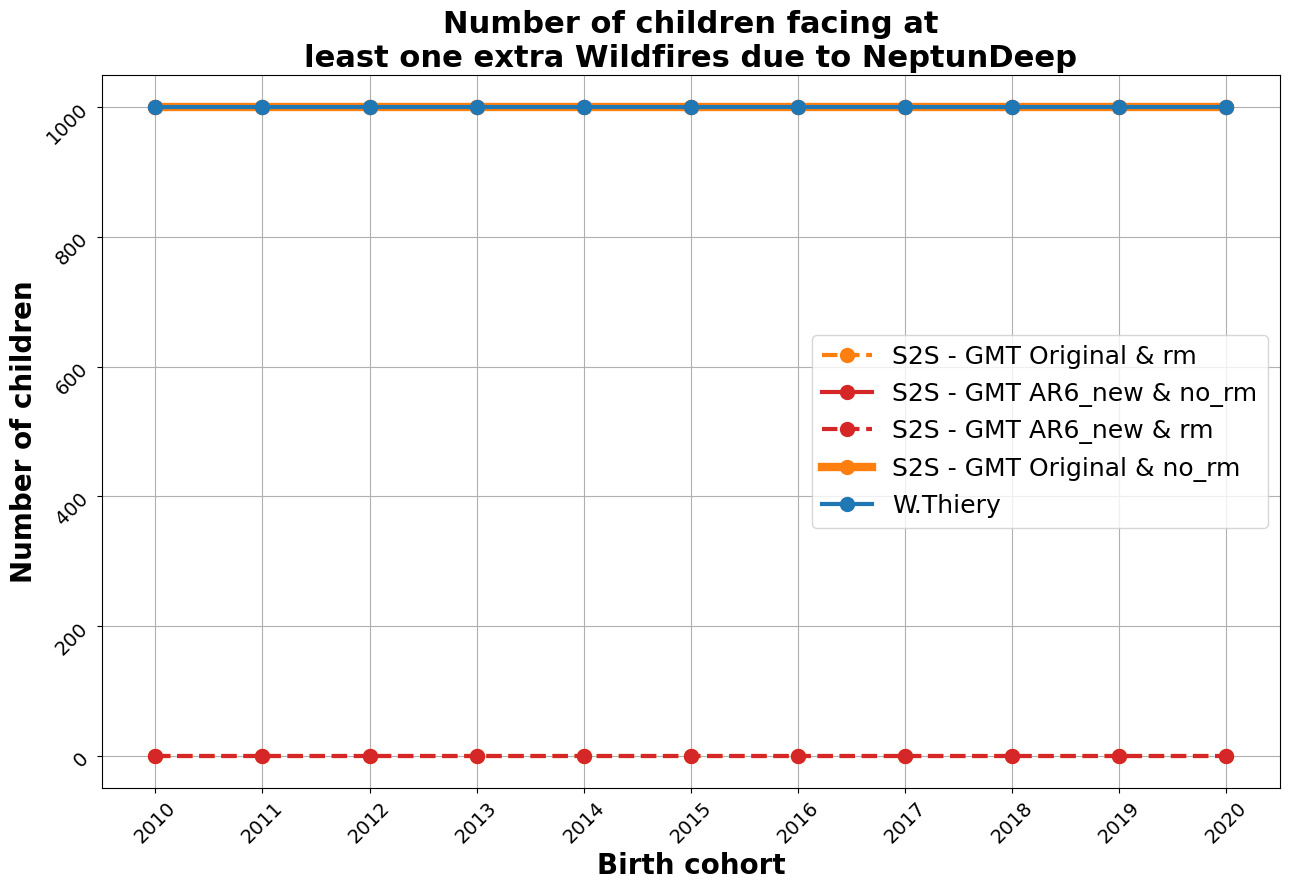

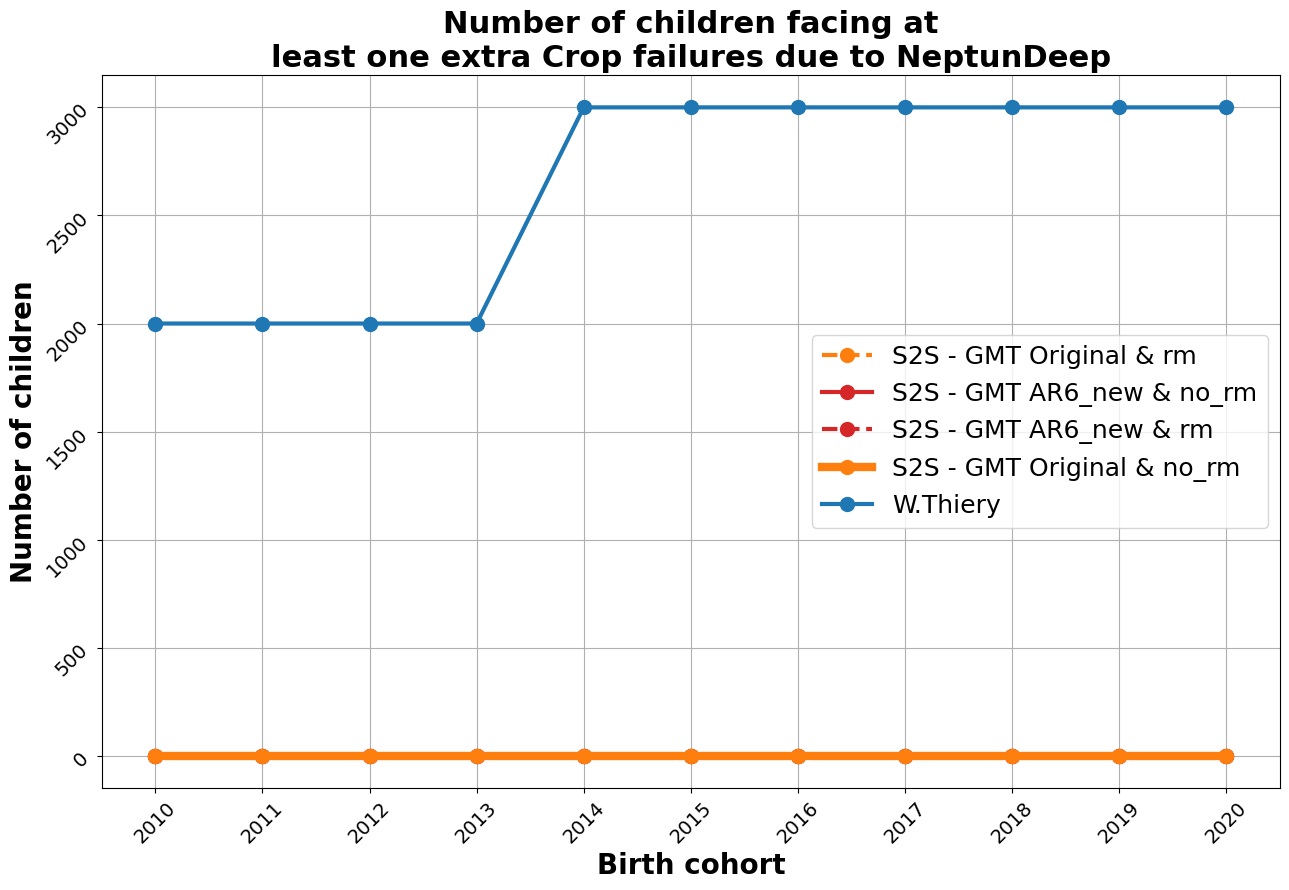

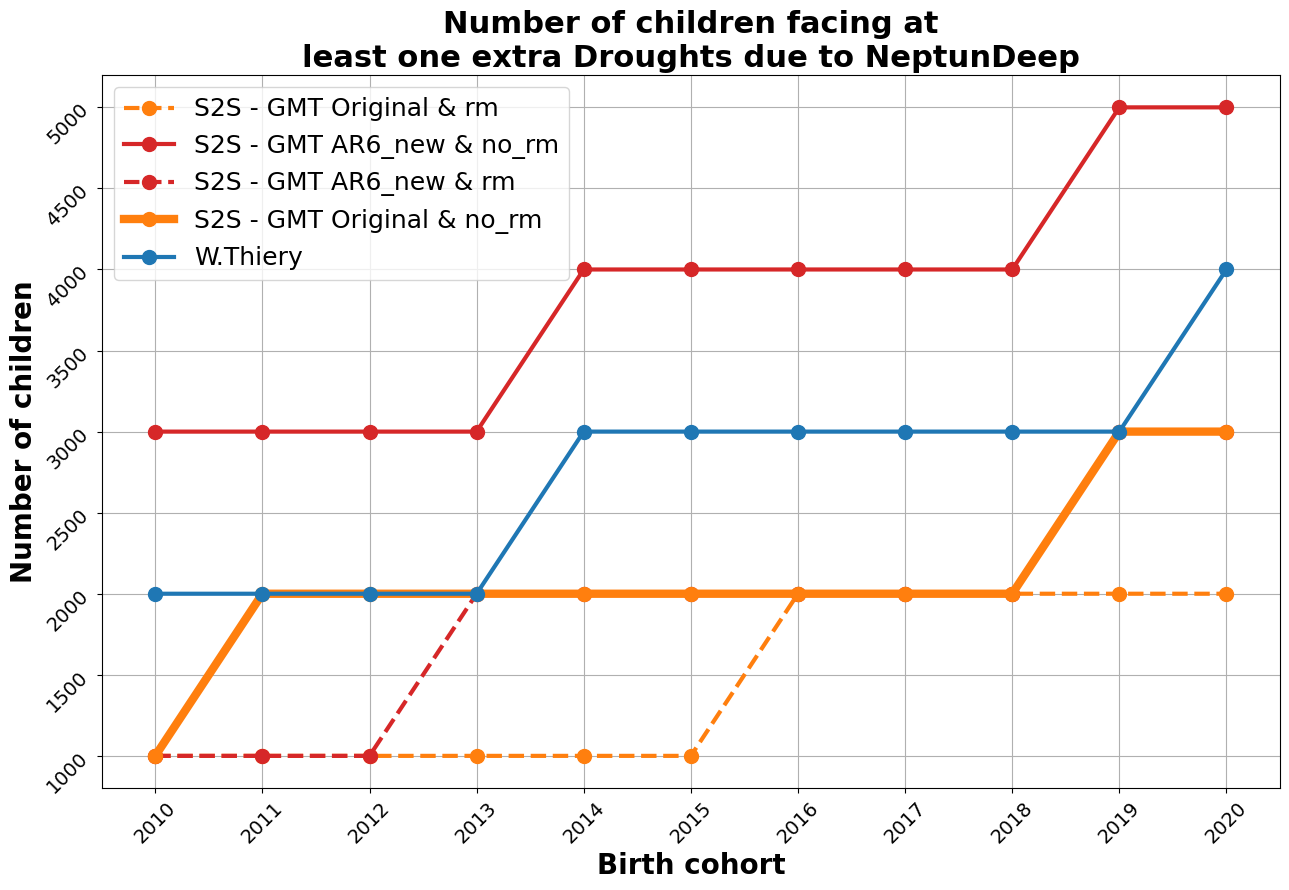

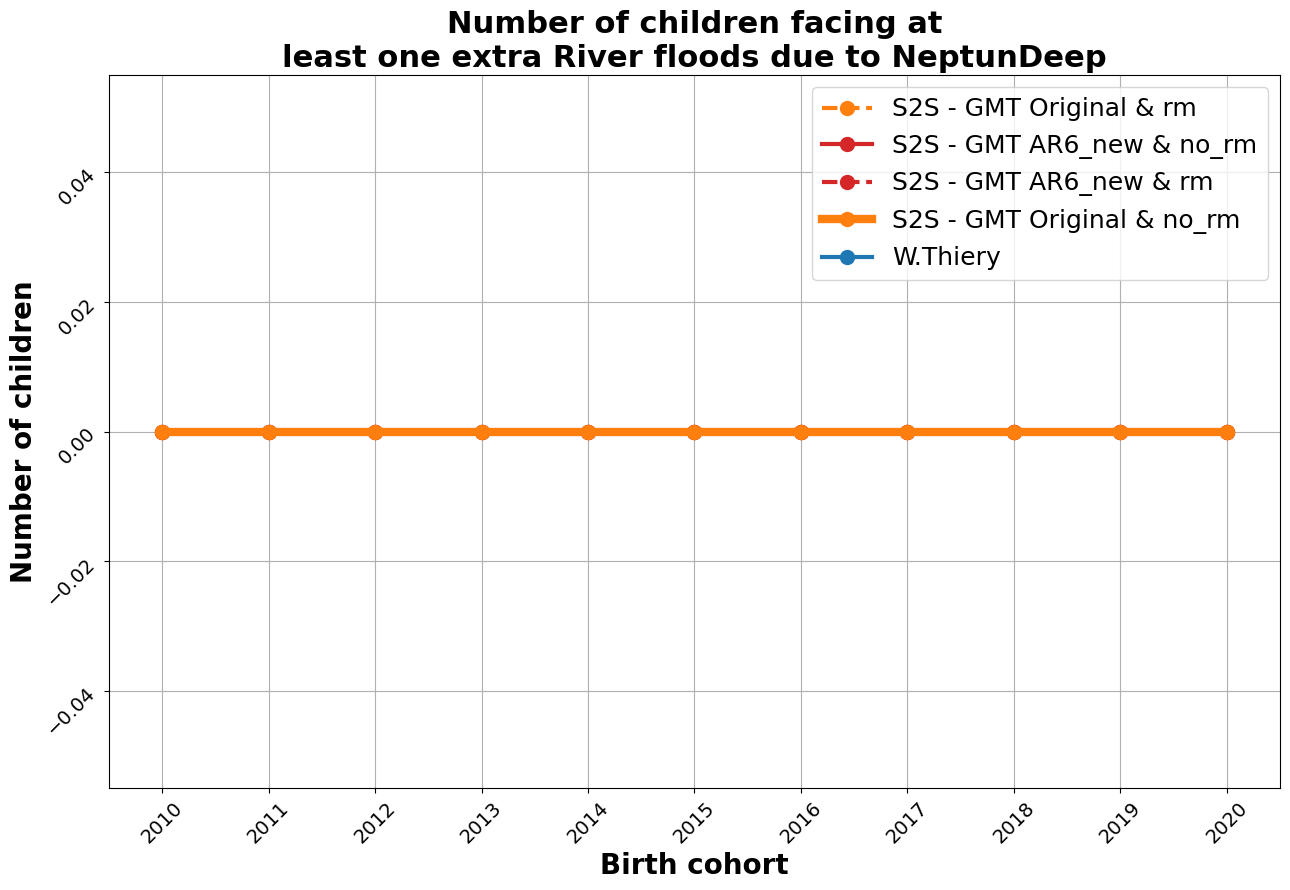

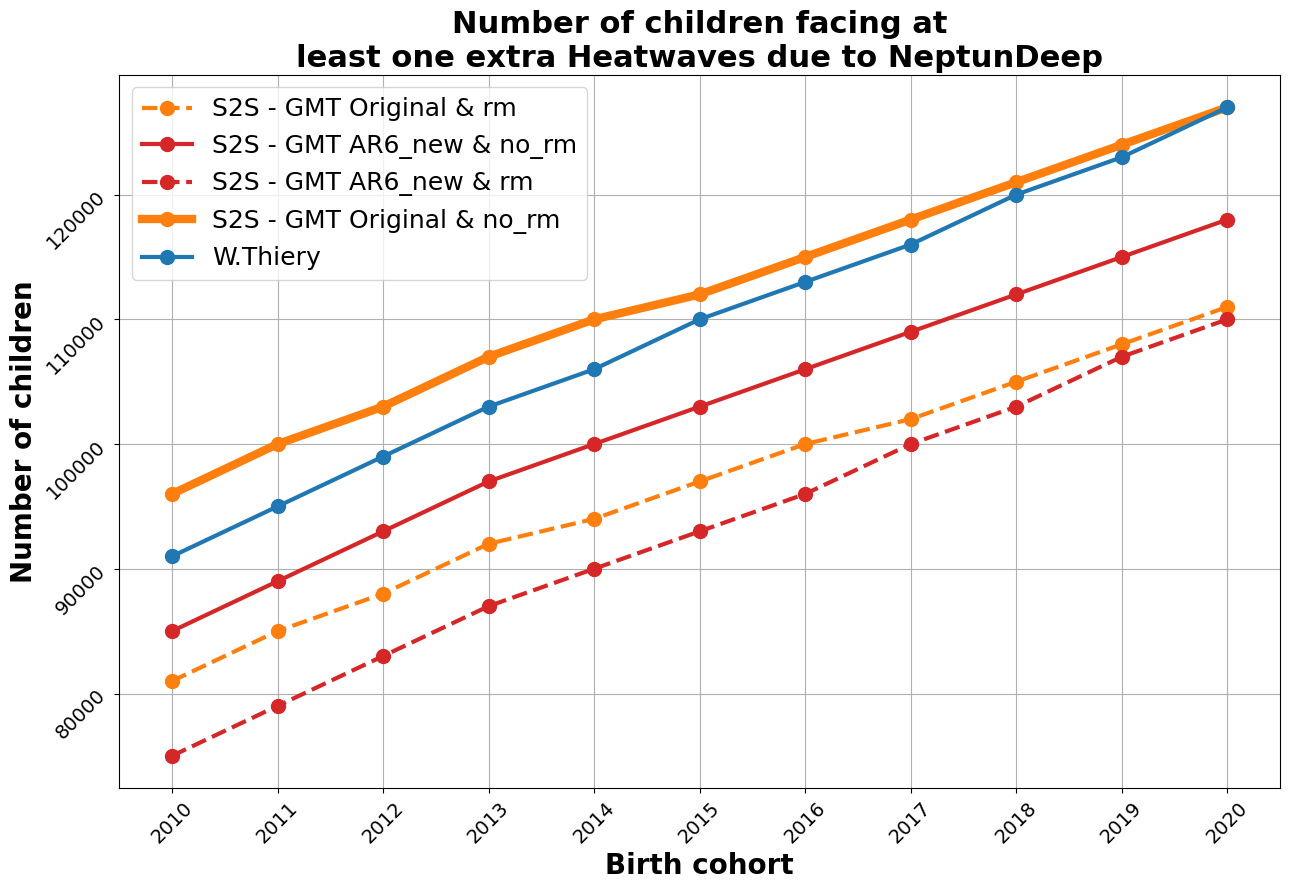

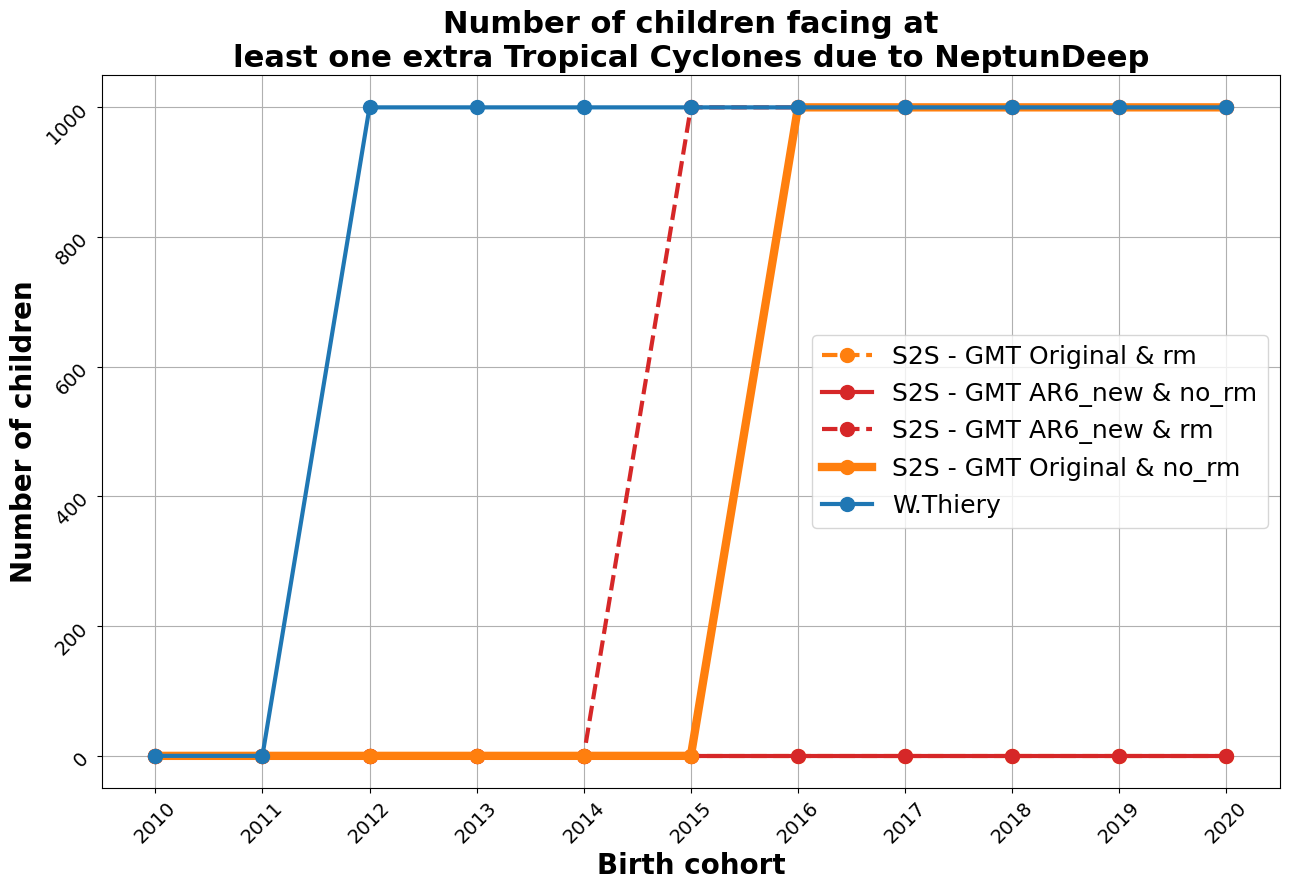

In [17]:
for i in range(len(da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.coords["hazard"])):
    
    da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel= da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm.isel(hazard=i)

    plot_dev_fig16(da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel,
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm_sel, 
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm_sel,
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm_sel,
        da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm_sel,
        birth_cohort_int,hazards[i])

Plot of the error given by the S2S framework with the different combinaison of flags['gmt'] and flags['rm'] compare to W.Thiery et al.(2021)

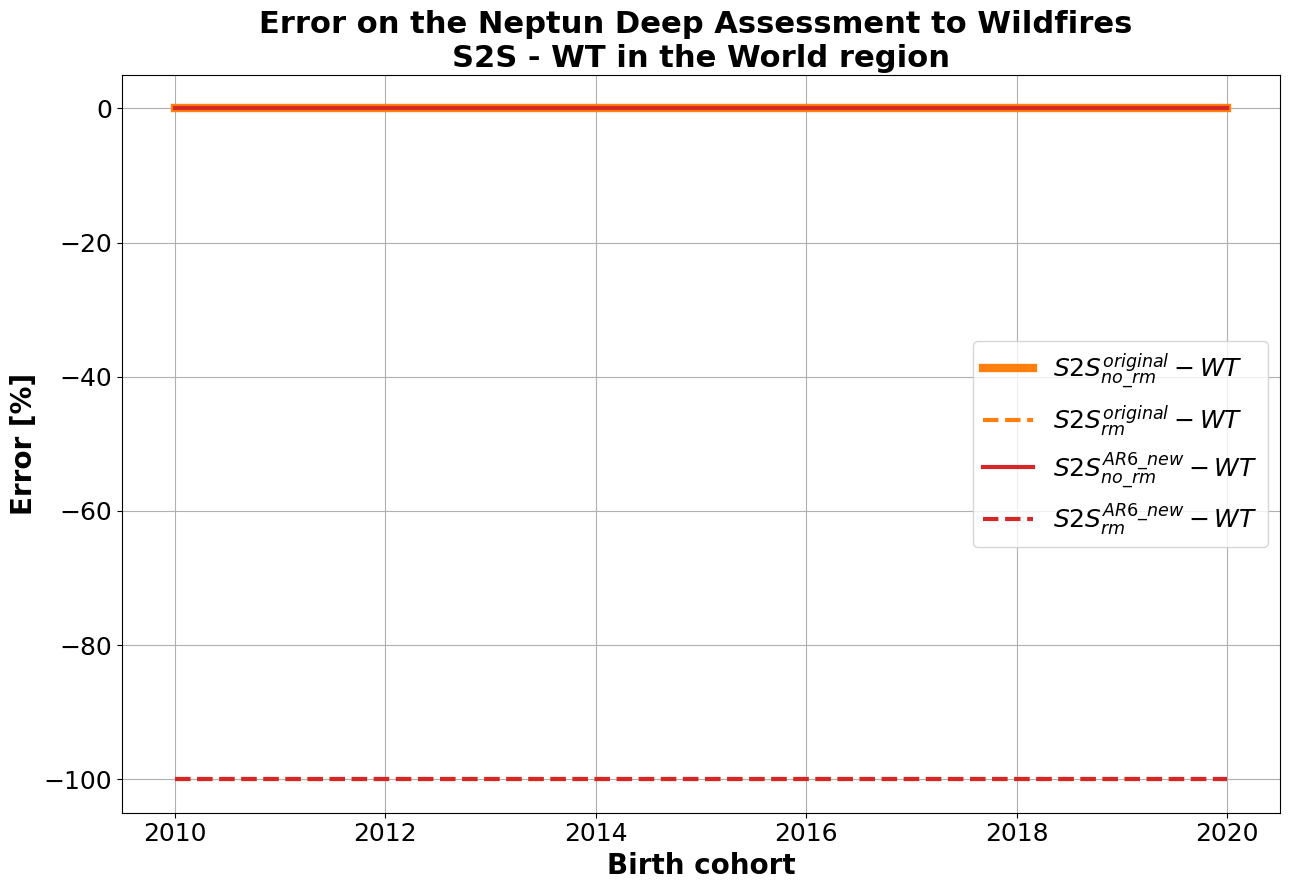

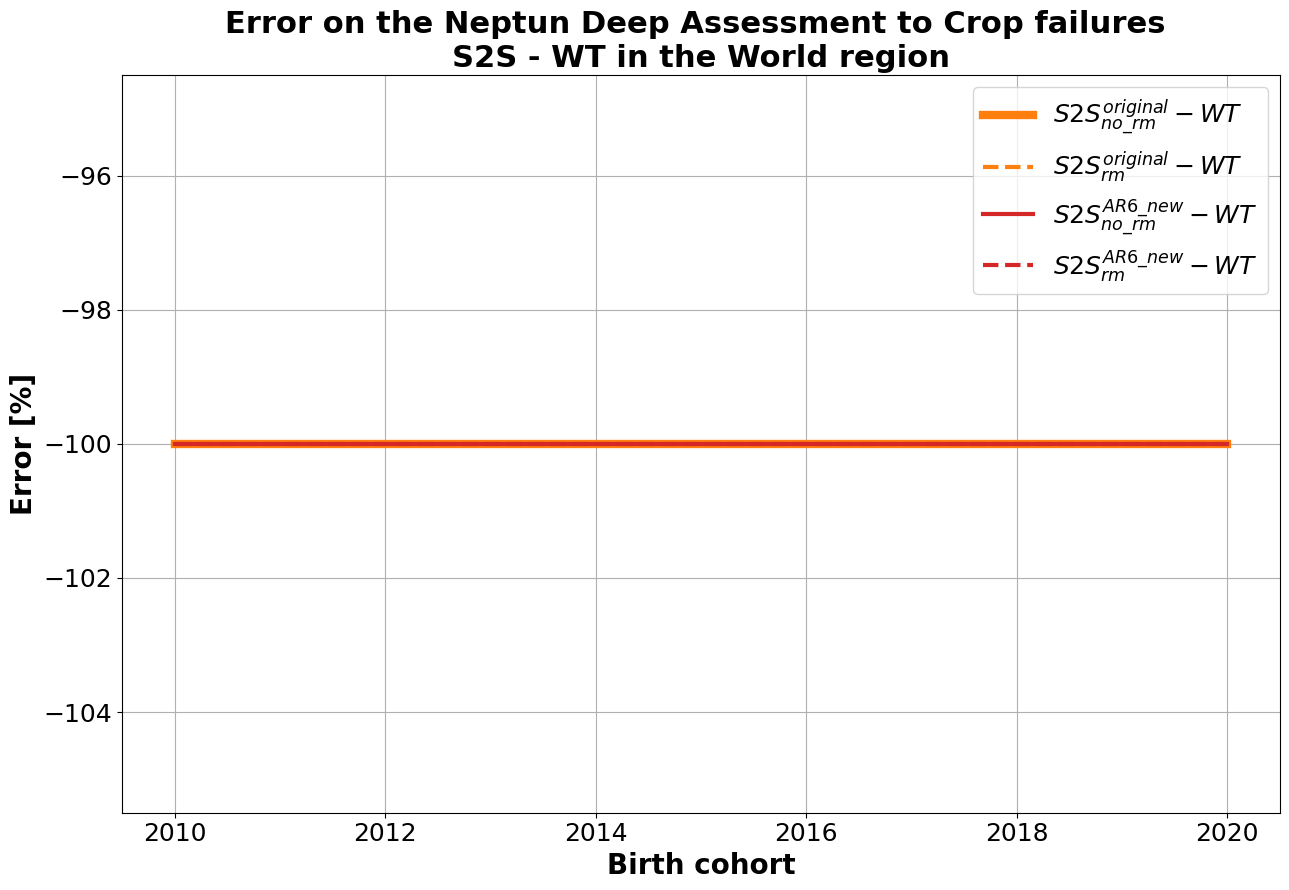

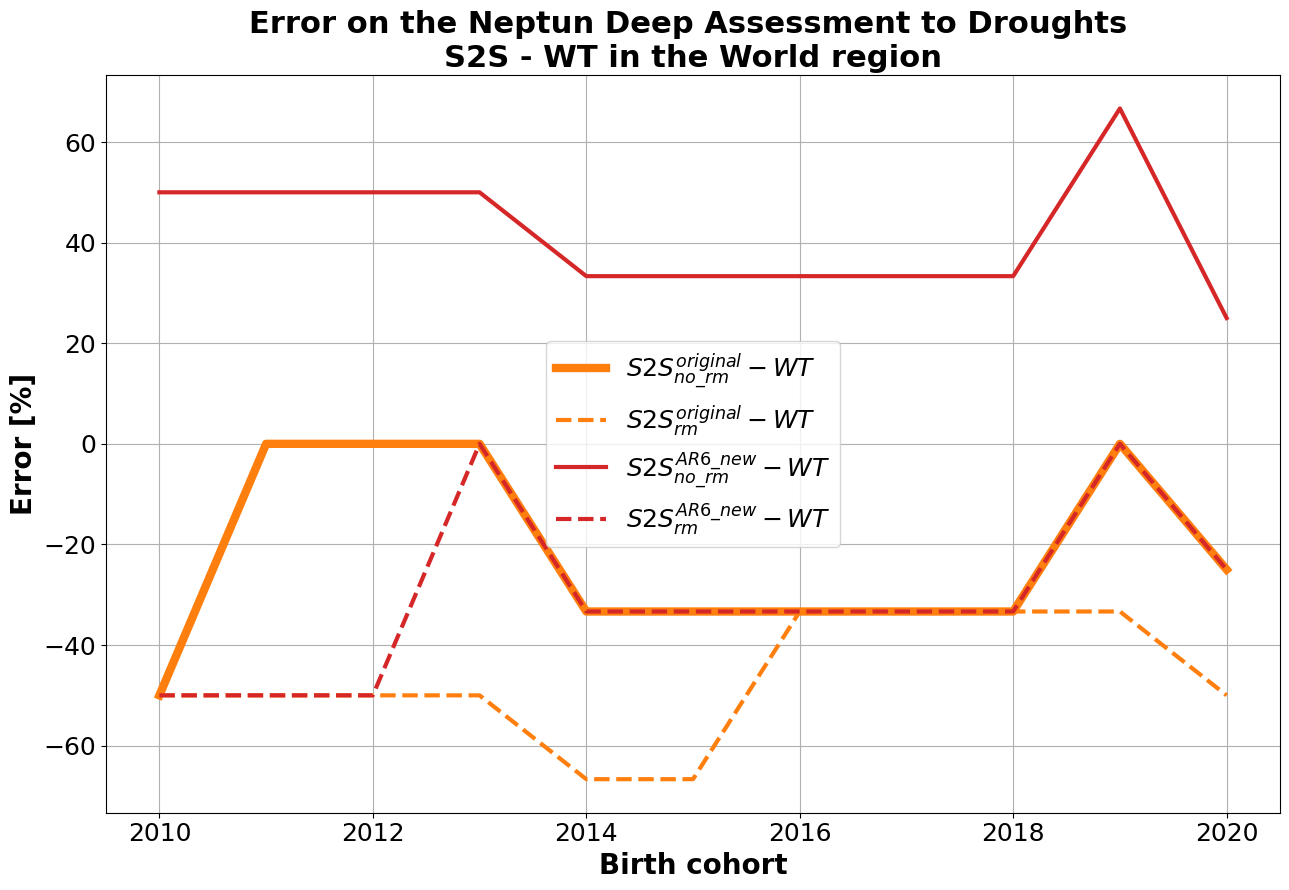

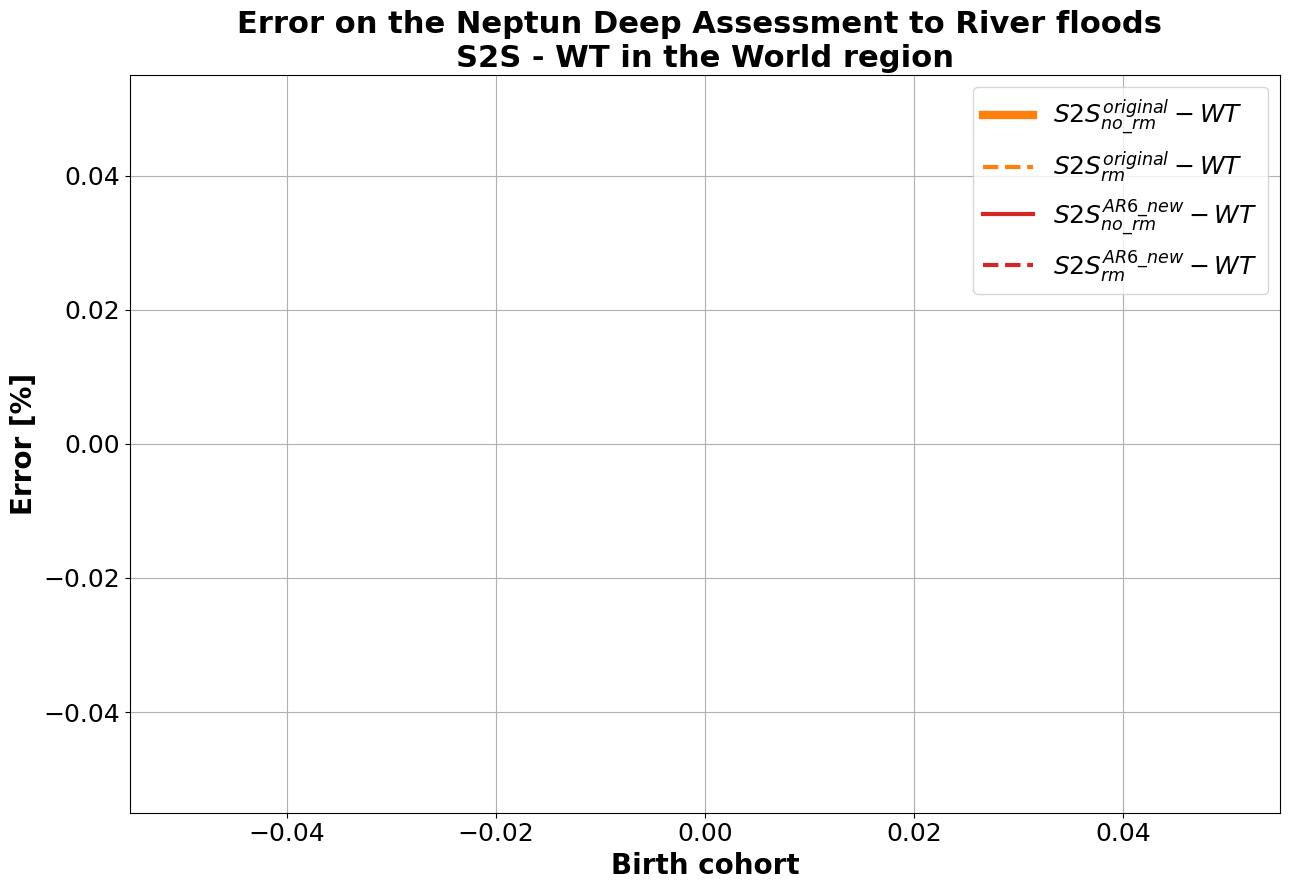

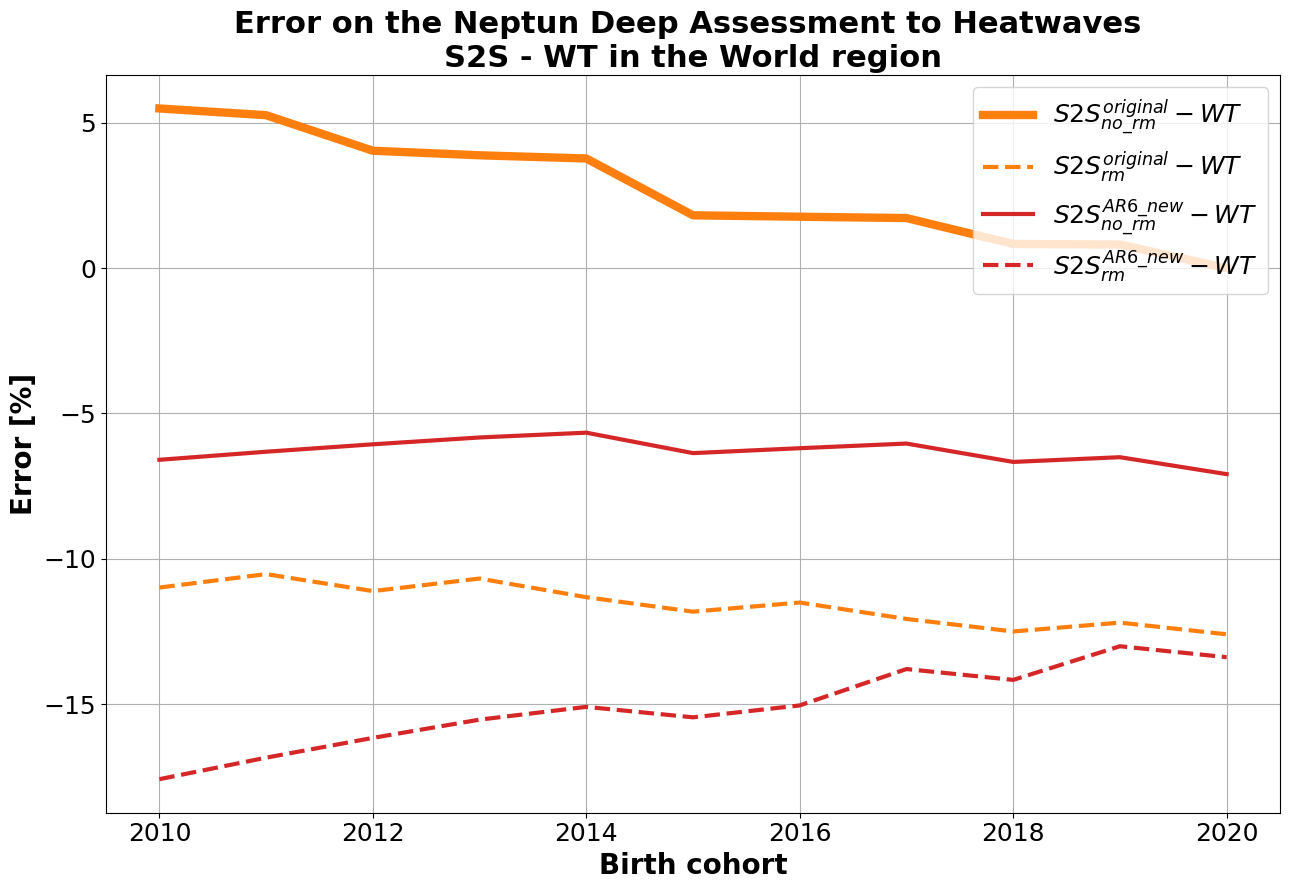

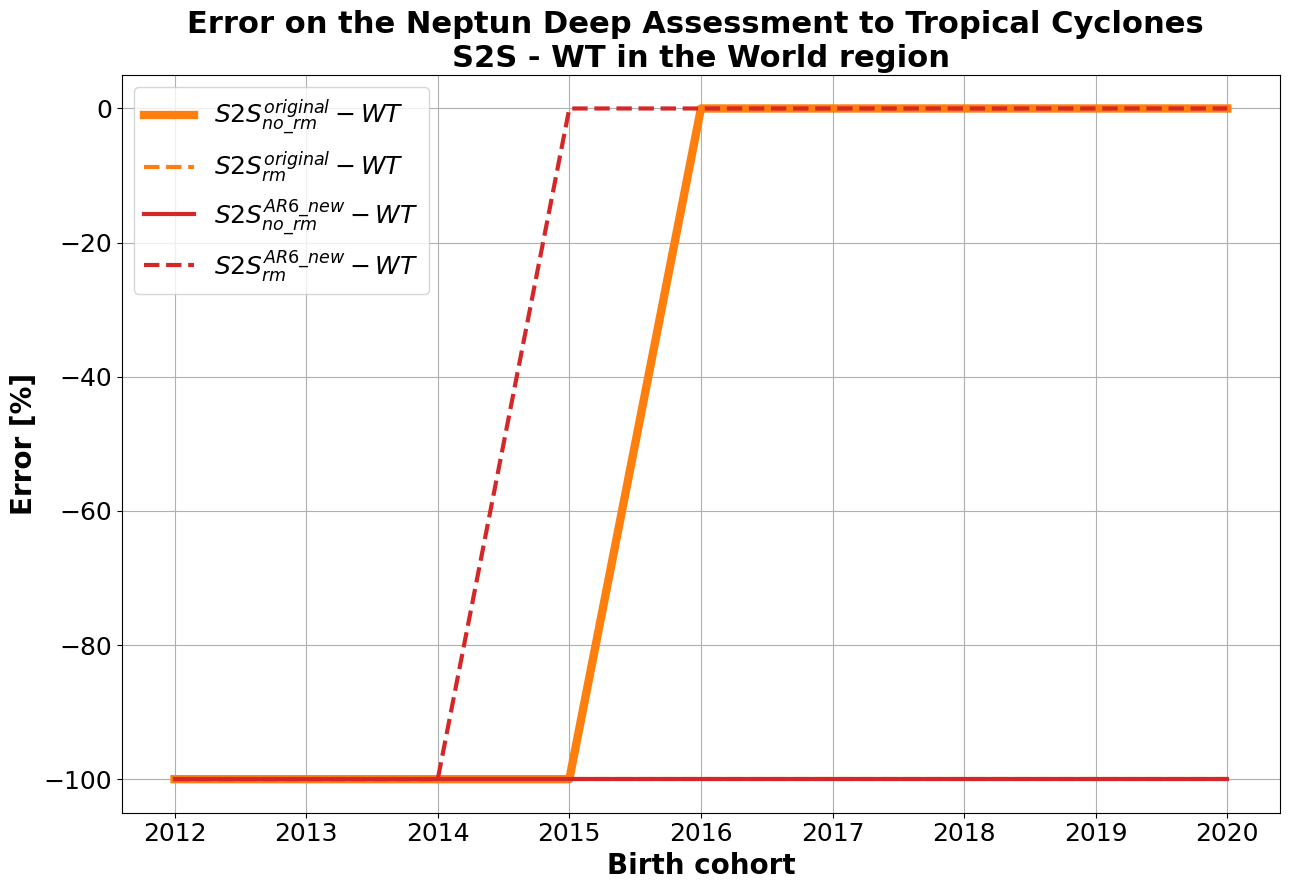

In [18]:
for i in range(len(da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.coords["hazard"])):

    da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel= da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm.isel(hazard=i)

    da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm_sel = da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm.isel(hazard=i)

    plt.close('all')

    plt.figure(figsize=(13, 9))

    if i==0:
        hazards_name = 'Wildfires'
    if i==1:
        hazards_name = 'Crop failures'
    if i==2:
        hazards_name = 'Droughts'
    if i==3:
        hazards_name = 'River floods'
    if i==4:
        hazards_name = 'Heatwaves'
    if i==5:
        hazards_name = 'Tropical Cyclones'

    # Tracer la différence (no_rm - rm) pour chaque scénario
    plt.plot(
        birth_cohort_int,
        (((da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_no_rm_sel - da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel))/da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel)*100,
        linestyle='-',
        color='tab:orange',
        label=r'$S2S_{no\_rm}^{original} - WT$',
        lw=6
    )

    plt.plot(
        birth_cohort_int,
        (((da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_original_rm_sel - da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel))/da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel)*100,
        linestyle='--',
        color='tab:orange',
        label=r'$S2S_{rm}^{original} - WT$',
        lw=3
    )

    plt.plot(
        birth_cohort_int,
        (((da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_no_rm_sel - da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel))/da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel)*100,
        linestyle='-',
        color='tab:red',
        label=r'$S2S_{no\_rm}^{AR6\_new} - WT$',
        lw=3
    )

    plt.plot(
        birth_cohort_int,
        (((da_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_ar6_new_rm_sel - da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel))/da_wt_valc_nr_children_facing_extra_hazard_NeptunDeep_sel)*100,
        linestyle='--',
        color='tab:red',
        label=r'$S2S_{rm}^{AR6\_new} - WT$',
        lw=3
    )


    # Mise en forme du graphique
    plt.title(
        "Error on the Neptun Deep Assessment to {} \nS2S - WT in the {} region".format(hazards_name, region_name),
        fontsize=22,
        fontweight='bold'
    )
    # Axis labels
    plt.xlabel("Birth cohort", fontsize=20, fontweight='bold')
    plt.ylabel("Error [%]", fontsize=20, fontweight='bold')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(fontsize=18)
    plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig11_Neptun_Deep_valc_S2S_WT_error_{}.png'.format(hazards_name))
    plt.show()

Plot of the total value of number of children affected

In [19]:
with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_{}_{}.pkl'.format('original','no_rm'), 'rb') as f:
            ds_valc_nr_children_facing_extra_hazard_NeptunDeep_original_no_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_{}_{}.pkl'.format('original','rm'), 'rb') as f:
            ds_valc_nr_children_facing_extra_hazard_NeptunDeep_original_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_{}_{}.pkl'.format('ar6_new','no_rm'), 'rb') as f:
            ds_valc_nr_children_facing_extra_hazard_NeptunDeep_ar6_new_no_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_valc_nr_children_facing_extra_hazard_NeptunDeep_gmt_{}_{}.pkl'.format('original','rm'), 'rb') as f:
            ds_valc_nr_children_facing_extra_hazard_NeptunDeep_ar6_new_rm = pk.load(f)

with open(data_dir+'source2suffering/assessment/Neptun_Deep/ds_wt_valc_nr_children_facing_extra_hazard_NeptunDeep.pkl', 'rb') as f:
            ds_wt_valc_nr_children_facing_extra_hazard_NeptunDeep = pk.load(f)

print(ds_wt_valc_nr_children_facing_extra_hazard_NeptunDeep['wt_total_valc_nr_children_facing_extra_hazard_NeptunDeep'])

print(ds_valc_nr_children_facing_extra_hazard_NeptunDeep_original_no_rm['valc_total_nr_children_facing_extra_hazard_NeptunDeep'])

<xarray.DataArray 'wt_total_valc_nr_children_facing_extra_hazard_NeptunDeep' (
                                                                              hazard: 6)>
array([  11000.,   29000.,   31000.,      nan, 1203000.,    9000.])
Coordinates:
  * hazard   (hazard) <U20 'burntarea' ... 'tropicalcyclonedarea'
<xarray.DataArray 'valc_total_nr_children_facing_extra_hazard_NeptunDeep' (
                                                                           hazard: 6)>
array([  11000.,       0.,   23000.,       0., 1233000.,    5000.])
Coordinates:
  * hazard   (hazard) <U20 'burntarea' ... 'tropicalcyclonedarea'


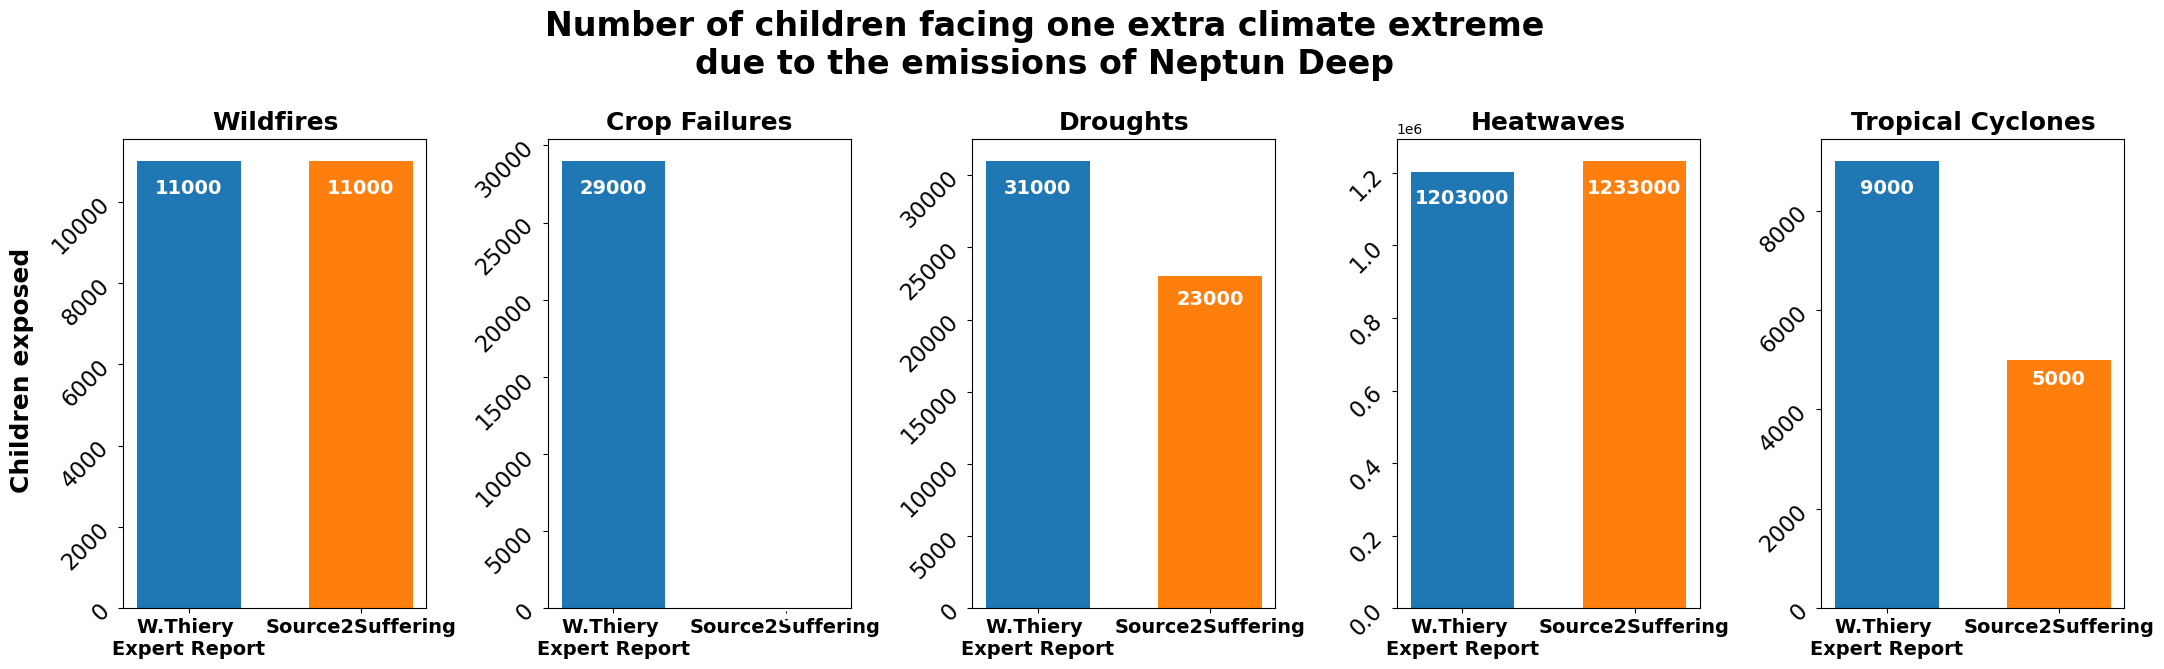

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

# Get original data
hazards_all = ds_valc_nr_children_facing_extra_hazard_NeptunDeep_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep'
].coords['hazard'].values
values_S2S_all = ds_valc_nr_children_facing_extra_hazard_NeptunDeep_original_no_rm[
    'valc_total_nr_children_facing_extra_hazard_NeptunDeep'
].values
values_wt_all = ds_wt_valc_nr_children_facing_extra_hazard_NeptunDeep[
    'wt_total_valc_nr_children_facing_extra_hazard_NeptunDeep'
].values

# Exclude 'floodedarea'
mask = hazards_all != 'floodedarea'

hazards = hazards_all[mask]
values_S2S = values_S2S_all[mask]
values_wt = values_wt_all[mask]

n = len(hazards)

# Create subplots
fig, axs = plt.subplots(1, n, figsize=(4.5*n, 8), sharey=False)

if n == 1:
    axs = [axs]

# Prettier hazard names
hazards_name = ['Wildfires', 'Crop Failures', 'Droughts', 'Heatwaves', 'Tropical Cyclones']

# Plot each hazard
for i in range(n):
    ax = axs[i]

    # Bars
    bar_wt = ax.bar(0, values_wt[i], width=0.6, color='tab:blue', label='Weighted')
    bar_s2s = ax.bar(1, values_S2S[i], width=0.6, color='tab:orange', label='Reference')

    # Axis config
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['W.Thiery \nExpert Report', 'Source2Suffering'], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=16, rotation=45)

    ax.set_title(hazards_name[i], fontsize=18, fontweight='bold')
    
    # Remove y-axis label from individual plots
    ax.set_ylabel('')

    # Annotate values on top
    if not np.isnan(values_wt[i]):
        ax.text(0, values_wt[i]*0.96, f'{values_wt[i]:.0f}', ha='center', va='top', 
                color='white', fontweight='bold', fontsize=14)
    if not np.isnan(values_S2S[i]):
        ax.text(1, values_S2S[i]*0.96, f'{values_S2S[i]:.0f}', ha='center', va='top', 
                color='white', fontweight='bold', fontsize=14)

# Add a single y-axis label for all subplots
fig.text(0.04, 0.45, 'Children exposed', va='center', rotation='vertical', fontsize=18, fontweight='bold')

# Global title and layout
fig.suptitle(
    "Number of children facing one extra climate extreme\n"
    "due to the emissions of Neptun Deep",
    fontsize=24, fontweight='bold', y=0.90
)

# Improve spacing and layout
plt.tight_layout(rect=[0.05, 0.07, 1, 0.90])

# Optional legend below the plots
handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

plt.savefig(scripts_dir + '/figures/source2suffering/validation_backward_compatibility/fig12_Neptun_Deep_valc_total_S2S_WT_comp.png')
plt.show()
error 

#### 2.Comparison of the metric : Slope hazard/°C

## ?. Results of the Lifetime Exposure (LE) assessment

### Effect of the smoothing before remapping

### Effect of the Geometric Mean

### Effect of the Demography differences 

### SR15 Vs AR6 Stylized trajectories